In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("wine.csv")
df = pd.DataFrame(data)
print(df)

mean= df['volatile acidity'].mean()
print(f"The mean of the volatile acidity : ",mean)

median= df['volatile acidity'].median()
print(f"The median of the volatile acidity :", median)

mode= df['volatile acidity'].mode()
print(f"The mode of the volatile acidity :", mode)

variance = df['volatile acidity'].var()
print(f"The variance of volatile acidity :" , variance)

std = df['volatile acidity'].std()
print(f"The std. deviation of volatile acidity :", std)



range = df['volatile acidity'].max() - df['volatile acidity'].min()
print(f"The range of {'volatile acidity'}: {range}")

target_col = 'volatile acidity'
series = df[target_col]

Q1 = series.quantile(0.25)
Q3 = series.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = series[(series < lower_bound) | (series > upper_bound)]

print(f"The Q1 (25th percentile) of {target_col}: {Q1}")
print(f"The Q3 (75th percentile) of {target_col}: {Q3}")
print(f"The IQR (Interquartile Range) of {target_col}: {IQR}")
print(f"The Lower Bound for Outliers: {lower_bound}")
print(f"The Upper Bound for Outliers: {upper_bound}")
print(f"The number of Outliers detected: {len(outliers)}")
print(f"The Outlier values:\n{outliers.to_string(index=False)}")


mean_val = series.mean()
std_dev = series.std()
coeff_of_variance = (std_dev / mean_val) * 100
print(f"The Coefficient of Variation of {target_col}: {coeff_of_variance:.4f}%")

# Correlation and Covariance (volatile acidity vs chlorides)
corr = df['volatile acidity'].corr(df['chlorides'])
print(f"The correlation between volatile acidity & chlorides : ", corr)

cov = df['volatile acidity'].cov(df['chlorides'])
print(f"The covariance between volatile acidity & chlorides :", cov)



    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             NaN               7.4        0.700            0.00        1.9   
1             NaN               7.8        0.880            0.00        2.6   
2             NaN               7.8        0.760            0.04        2.3   
3             NaN              11.2        0.280            0.56        1.9   
4             NaN               7.4        0.700            0.00        1.9   
5             NaN               7.4        0.660            0.00        1.8   
6             NaN               7.9        0.600            0.06        1.6   
7             NaN               7.3        0.650            0.00        1.2   
8             NaN               7.8        0.580            0.02        2.0   
9             NaN               7.5        0.500            0.36        6.1   
10            NaN               6.7        0.580            0.08        1.8   
11            NaN               7.5        0.500    

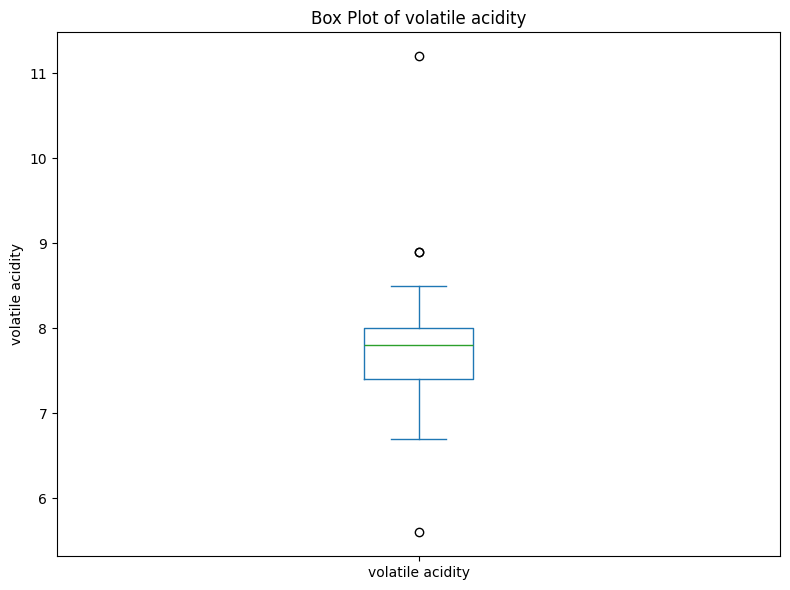

In [ ]:
plt.figure(figsize=(8, 6))
series.plot(kind='box')
plt.title(f'Box Plot of {target_col}')
plt.ylabel(target_col)
plt.grid(False)
plt.tight_layout()
boxplot_filename = 'volatile_acidity_extended_boxplot.png'
plt.savefig(boxplot_filename)
plt.show()

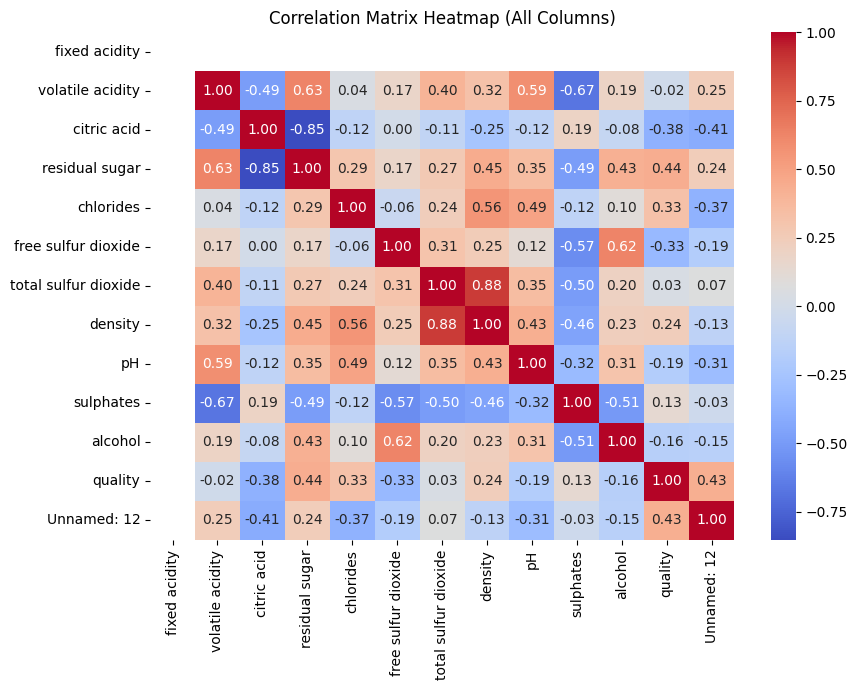


Box plot saved as: volatile_acidity_extended_boxplot.png
Correlation heatmap saved as: full_correlation_heatmap.png


In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap (All Columns)')
plt.tight_layout()
heatmap_filename = 'full_correlation_heatmap.png'
plt.savefig(heatmap_filename)
plt.show()

print(f"\nBox plot saved as: {boxplot_filename}")
print(f"Correlation heatmap saved as: {heatmap_filename}")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset again, using the first column (which is blank/index) as the index to align columns correctly
file_path = "wine.csv"
df = pd.read_csv(file_path, index_col=0)

# Inspect the data
print("DataFrame Head:")
print(df.head())
print("\nDataFrame Info:")
df.info()

# Clean column names by stripping whitespace
df.columns = df.columns.str.strip()

# Re-inspect columns
print("\nCleaned Column Names:")
print(df.columns)

# Define the target column
target_col = 'volatile acidity'

# Check for a remaining 'quality' column (now named 'quality,') and rename if necessary
if 'quality,' in df.columns:
    df.rename(columns={'quality,': 'quality'}, inplace=True)
    print("\nRenamed 'quality,' to 'quality'")
    print(df.columns)

# Convert all columns to numeric, coercing errors to NaN for robust calculations
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with any NaN values after conversion (due to bad data from the snippet)
df.dropna(inplace=True)

# Re-check the target column to make sure it's present and numeric
if target_col not in df.columns or not pd.api.types.is_numeric_dtype(df[target_col]):
    raise ValueError(f"Column '{target_col}' not found or not numeric after cleaning.")

# Now proceed with calculations

# 1. Descriptive Statistics for 'volatile acidity'
mean_val = df[target_col].mean()
median_val = df[target_col].median()
mode_val = df[target_col].mode()
std_dev = df[target_col].std()
variance = df[target_col].var()

# 2. Range and IQR
range_val = df[target_col].max() - df[target_col].min()
Q1 = df[target_col].quantile(0.25)
Q3 = df[target_col].quantile(0.75)
IQR = Q3 - Q1

# 3. Outlier Detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[target_col] < lower_bound) | (df[target_col] > upper_bound)]

# 4. Coefficient of Variation
coeff_of_variance = (std_dev / mean_val) * 100

# Store results in a dictionary
results = {
    'Mean': mean_val,
    'Median': median_val,
    'Mode': mode_val.to_list(),
    'Standard Deviation': std_dev,
    'Variance': variance,
    'Range': range_val,
    'Q1': Q1,
    'Q3': Q3,
    'IQR': IQR,
    'Lower Bound (Outliers)': lower_bound,
    'Upper Bound (Outliers)': upper_bound,
    'Number of Outliers': len(outliers),
    'Coefficient of Variation (%)': coeff_of_variance
}

# 5. Correlation and Covariance (for all numerical columns)
correlation_matrix = df.corr()
covariance_matrix = df.cov()

# Save correlation matrix to a CSV for user access
correlation_matrix.to_csv('correlation_matrix.csv')

# 6. Box Plot for 'volatile acidity'
plt.figure(figsize=(8, 6))
df.boxplot(column=[target_col])
plt.title(f'Box Plot of {target_col}')
plt.ylabel(target_col)
plt.grid(False)
plt.tight_layout()
plt.savefig('volatile_acidity_boxplot.png')
plt.close()

# 7. Heatmap for Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.close()

# Prepare final output data
print("\n--- Summary Statistics ---")
for key, value in results.items():
    print(f"{key}: {value}")

print(f"\nOutliers in '{target_col}':")
print(outliers[[target_col]])

print("\n--- Correlation Matrix Head ---")
print(correlation_matrix.head())

print("\n--- Covariance Matrix Head ---")
print(covariance_matrix.head())

DataFrame Head:
               volatile acidity  citric acid  residual sugar  chlorides  \
fixed acidity                                                             
NaN                         7.4         0.70            0.00        1.9   
NaN                         7.8         0.88            0.00        2.6   
NaN                         7.8         0.76            0.04        2.3   
NaN                        11.2         0.28            0.56        1.9   
NaN                         7.4         0.70            0.00        1.9   

               free sulfur dioxide  total sulfur dioxide  density      pH  \
fixed acidity                                                               
NaN                          0.076                    11       34  0.9978   
NaN                          0.098                    25       67  0.9968   
NaN                          0.092                    15       54  0.9970   
NaN                          0.075                    17       60  0.9980